## Multiple linear regression using House Price Data
< About the dataset >\
This dataset contains of house prices across the USA. It has the following colums:\
Avg. Area Income: Numerical data about the average area of the income where the house is located.\
House Age: Age of the house in years.\
Number of Rooms\
Number of Bedrooms\
Area Population: Population of the area where the house is located.\
Price\
Address: The only textual data in the dataset consisting of the address of the house.

### Steps of making Linear Regression Analysis:
1. Import dataset
2. Take sample from dataset.
3. Use pandas library to get descriptive statistics (mean. standard deviation, percentile)
4. Use pandas library to get correlation between each variable in the dataset
5. Set independent variable, x and dependent variable , y based on high correlation variables
6. Make boxplot for dependent and independent variable to check for outliers
7. Make scatterplot to see the trend between variables
8. Use statsmodels library to get linear regression model

In [1]:
# import library and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics
import statsmodels.api as sm
%matplotlib inline
np.random.seed(42)

In [2]:
# read the dataset 
house = pd.read_csv('house_price.csv')
house.head()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
# view the dataset info
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Avg. Area Income    4548 non-null   float64
 1   House Age           4548 non-null   float64
 2   Number of Rooms     4548 non-null   float64
 3   Number of Bedrooms  4548 non-null   float64
 4   Area Population     4548 non-null   float64
 5   Price               4548 non-null   float64
 6   Address             4548 non-null   object 
dtypes: float64(6), object(1)
memory usage: 248.8+ KB


In [4]:
# view the descriptive statistics
house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,4548.0,6.861170e+04,10686.487761,17796.631190,61485.150192,6.881704e+04,7.582074e+04,1.077017e+05
House Age,4548.0,5.978918e+00,0.990850,2.644304,5.332187,5.960872e+00,6.658368e+00,9.519088e+00
Number of Rooms,4548.0,6.987646e+00,1.006587,3.236194,6.299692,7.002245e+00,7.665871e+00,1.075959e+01
Number of Bedrooms,4548.0,3.981693e+00,1.230939,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,4548.0,3.618747e+04,9910.189915,172.610686,29423.163510,3.621556e+04,4.288055e+04,6.959204e+04
Price,4548.0,1.233916e+06,354567.591226,15938.657920,997775.110300,1.234571e+06,1.470616e+06,2.469066e+06


### Sampling
Take 300 sample of the house dataset by random. The dataset consist of 4500 houses.
For the purpose of study, we will use only 300 sample from the dataset.

In [5]:
# create new column 'index' and make it as index of data
# create new table from sample data
# we take average area income, house age, number of rooms, area population and price as columns

sample = house.sample(n = 300, random_state = 42)
sample['index'] = np.arange(0,300)
df = sample.loc[:,['Avg. Area Income','House Age','Number of Rooms','Number of Bedrooms','Area Population','Price']]
df['index'] = np.arange(0,300)
df = df.set_index('index')
columns = ['average_area_income','house_age','rooms','bedrooms','area_population','price']
df.columns = columns
df.head()

,average_area_income,house_age,rooms,bedrooms,area_population,price
index,,,,,,
0,62134.02206,7.445436,6.808879,2.20,32157.13169,1.399663e+06
1,50847.11311,4.973274,5.355861,4.38,34763.70381,3.989095e+05
2,60697.35154,6.170484,7.150537,6.34,28140.96709,7.439998e+05
3,63700.88828,6.534635,6.014719,2.07,52554.41103,1.312467e+06
4,74411.05989,5.534628,7.210123,6.44,43537.50295,1.393747e+06


### Correlation
Calculate the correlation between all independent variable and dependent variable.\
There is high correlation betweem previous exam score and student's performance score

<Axes: >

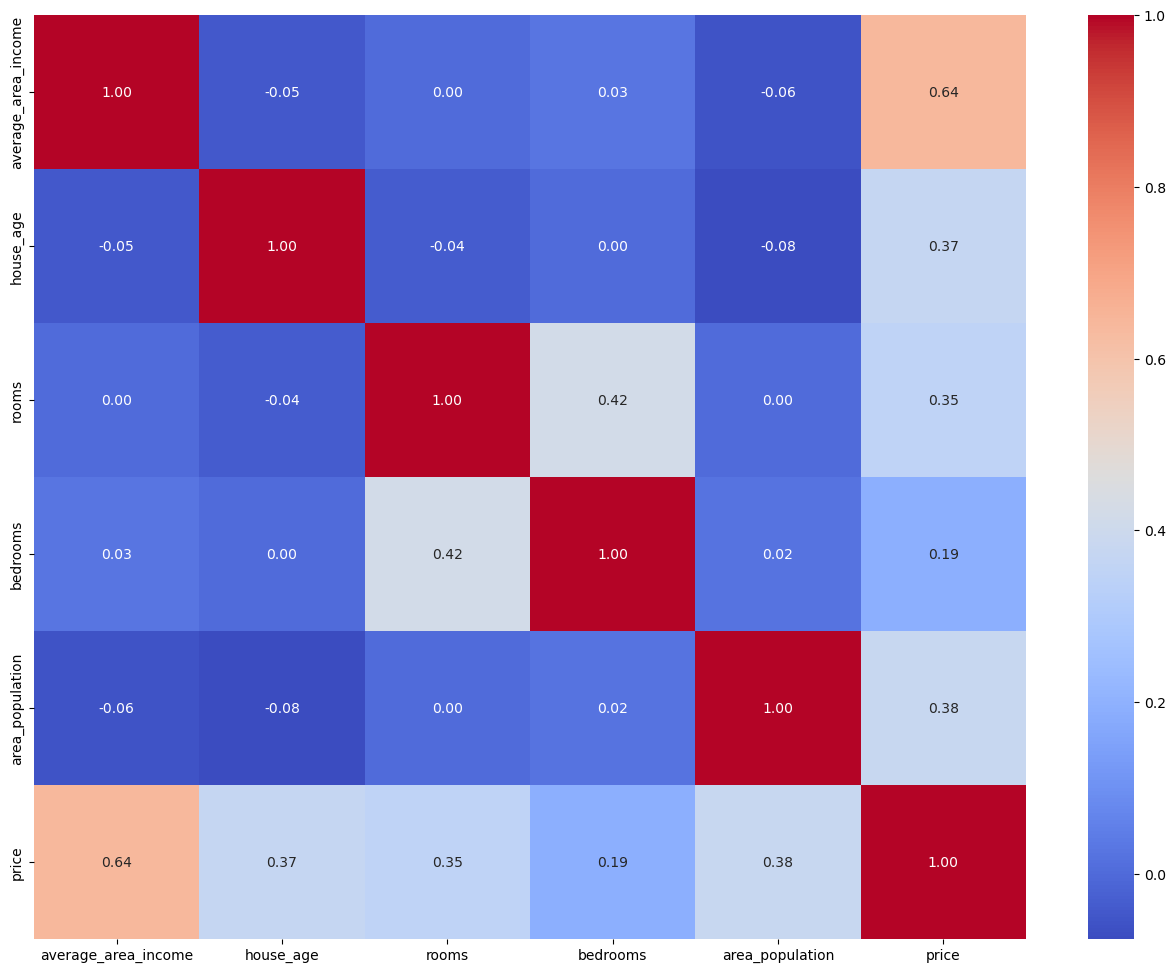

In [6]:
# calculate correalation
plt.figure(figsize = (16,12))
sns.heatmap(data = df.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

### Descriptive Statistics
count, mean, median, std dev, and percentile of the dataset

In [7]:
# sum nan data in the dataset
df.isnull().sum()

average_area_income    0
house_age              0
rooms                  0
bedrooms               0
area_population        0
price                  0
dtype: int64

In [8]:
# calculate the count, mean, std dev, min, max, precentile of dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
average_area_income,300.0,6.923584e+04,11051.218008,38139.919040,6.254746e+04,6.960565e+04,7.614142e+04,1.077017e+05
house_age,300.0,5.910647e+00,0.948757,3.105751,5.346616e+00,5.876121e+00,6.560029e+00,8.137214e+00
rooms,300.0,6.948565e+00,1.015735,3.950225,6.313440e+00,6.963965e+00,7.652472e+00,1.002438e+01
bedrooms,300.0,3.961833e+00,1.247187,2.000000,3.147500e+00,4.000000e+00,4.450000e+00,6.460000e+00
area_population,300.0,3.647513e+04,10011.239561,12450.578470,2.877811e+04,3.616225e+04,4.349046e+04,6.318461e+04
price,300.0,1.239935e+06,346905.446881,353240.054700,1.025323e+06,1.240684e+06,1.439968e+06,2.332111e+06


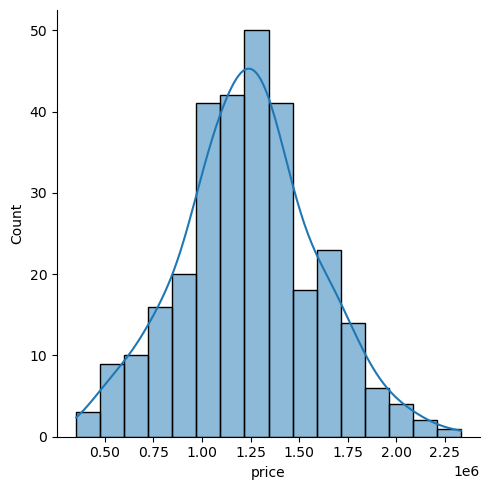

In [9]:
# show distribution of house price using seaborn
# make histogram and add KDE line
# Kernel Distribution Estimation Plot which depicts the probability density function of 
# the continuous or non-parametric data variables i.e. we can plot for the univariate or multiple variables altogether.

sns.displot(df['price'], kde = True)

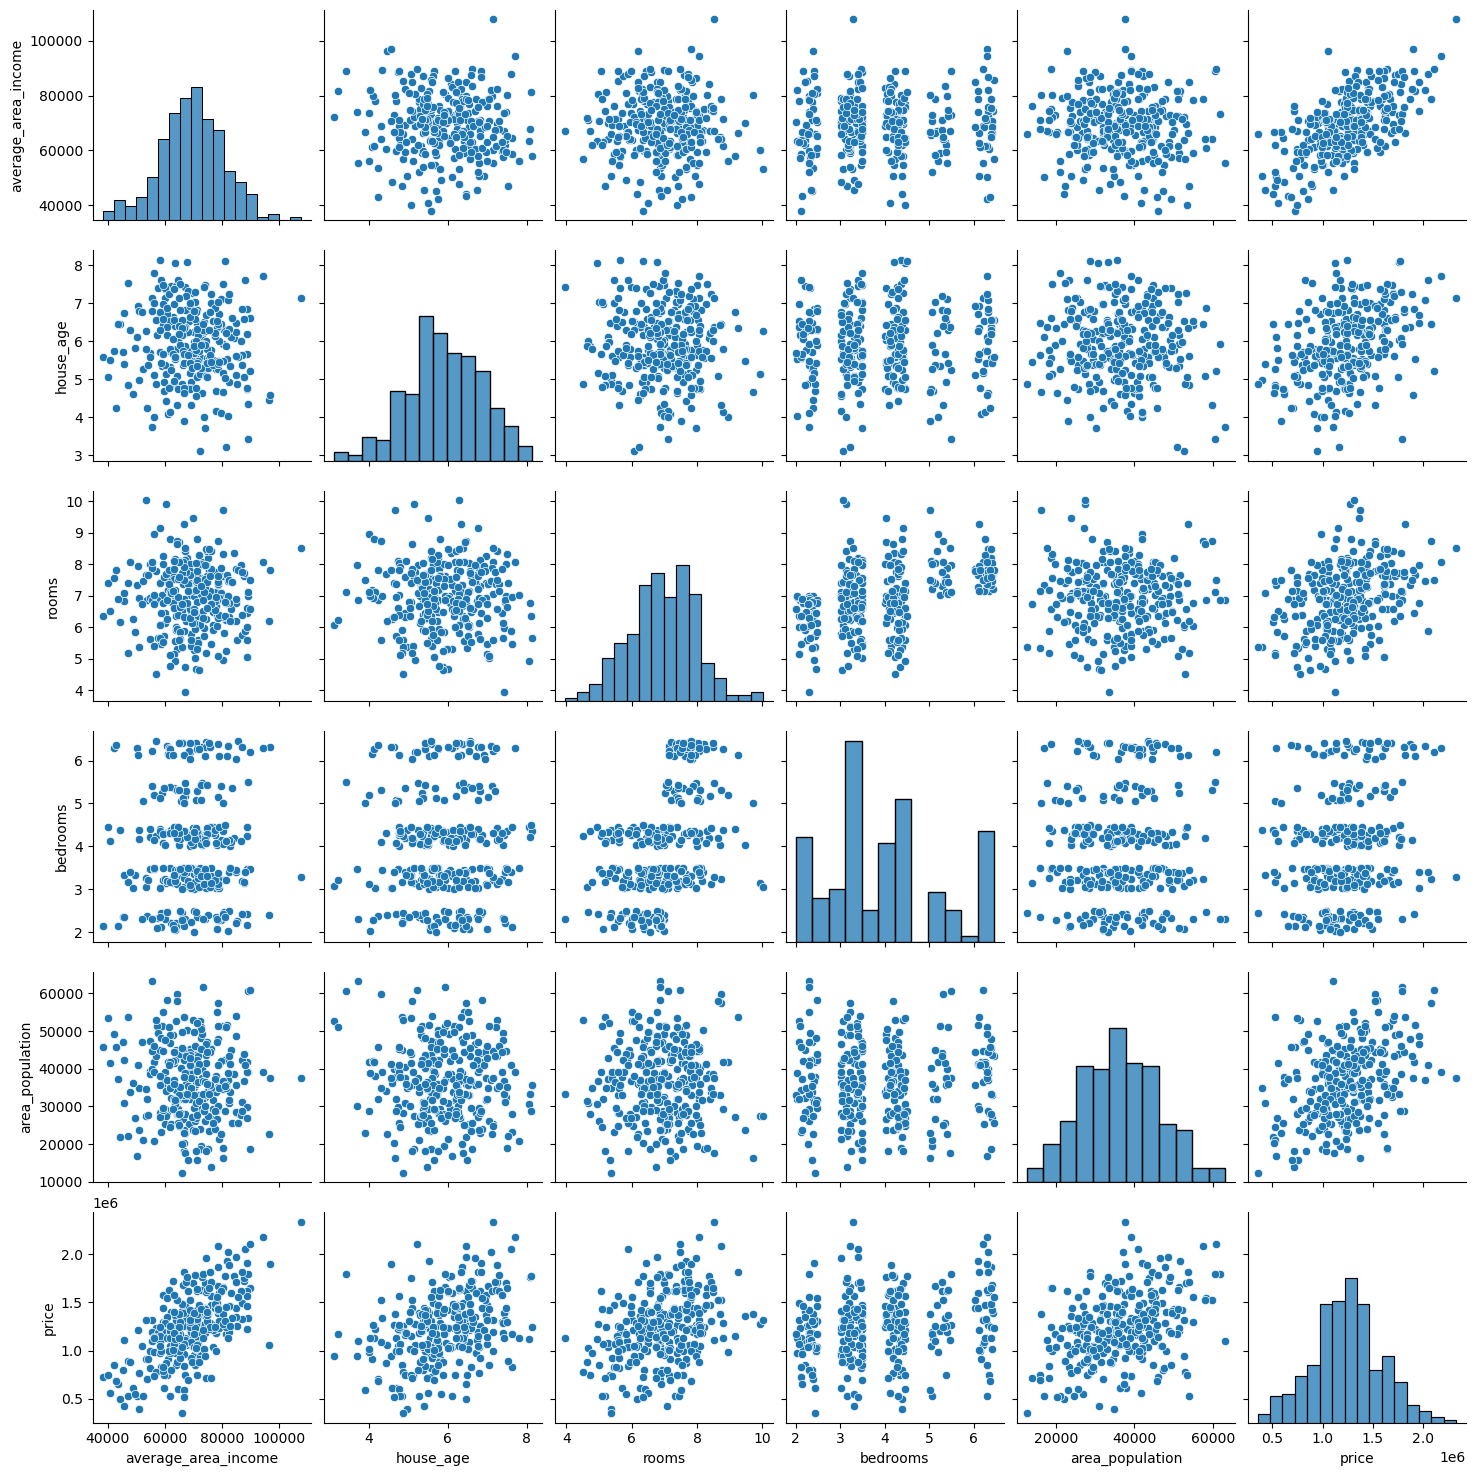

In [10]:
# seaborn pairplot
# Plot pairwise relationships in a dataset.

# By default, this function will create a grid of Axes such that each numeric variable in data 
# will by shared across the y-axes across a single row and the x-axes across a single column.

# The diagonal plots are treated differently: a univariate distribution plot is drawn 
# to show the marginal distribution of the data in each column.
sns.pairplot(df)

### Boxplot
See if there is any outlier in the dataset\
Only average_area_income and area_population is used for independent variable

In [11]:
# set independent and dependent variable
x = df[['average_area_income','house_age','rooms','bedrooms','area_population']]
y = df['price']

{'whiskers': [<matplotlib.lines.Line2D at 0x1d0c1fca860>,
 'caps': [<matplotlib.lines.Line2D at 0x1d0c1fcad40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d0c1fca5c0>,
 'medians': [<matplotlib.lines.Line2D at 0x1d0c1fcb280>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d0c1fcb520>,
 'means': []}

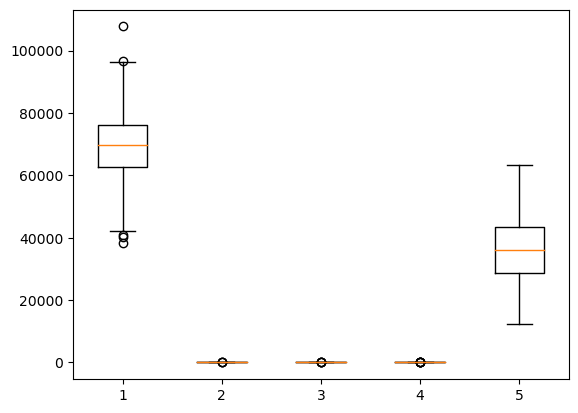

In [12]:
# box plot for average area income
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d0c38b6e00>,
 'caps': [<matplotlib.lines.Line2D at 0x1d0c38b7340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d0c38b6b60>],
 'medians': [<matplotlib.lines.Line2D at 0x1d0c38b7850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d0c38b7af0>],
 'means': []}

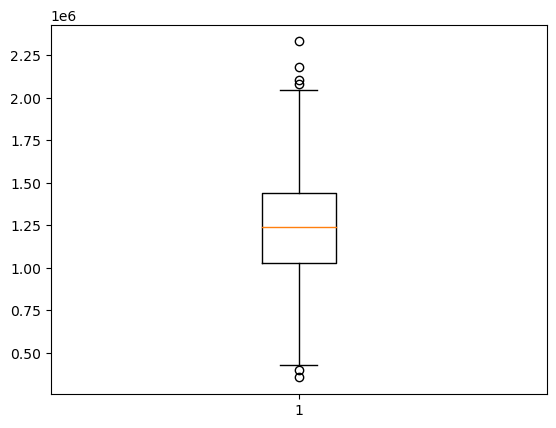

In [13]:
# boxplot for house price
plt.boxplot(y)

### Multiple Linear Regression using statsmodels
Stats model use Ordinary Least Square method that allow us to find the best line that describe the relationship between one or more predictor available and a response variable.

Statsmodels follows largely the traditional model where we want to know how well a given model fits the data, and what variables "explain" or affect the outcome, or what the size of the effect is. Scikit-learn follows the machine learning tradition where the main supported task is chosing the "best" model for prediction.

In [14]:
# add constant to predictor variable
X = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     604.2
Date:                Sun, 24 Sep 2023   Prob (F-statistic):          2.57e-152
Time:                        12:29:40   Log-Likelihood:                -3888.8
No. Observations:                 300   AIC:                             7790.
Df Residuals:                     294   BIC:                             7812.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.679e+06   7

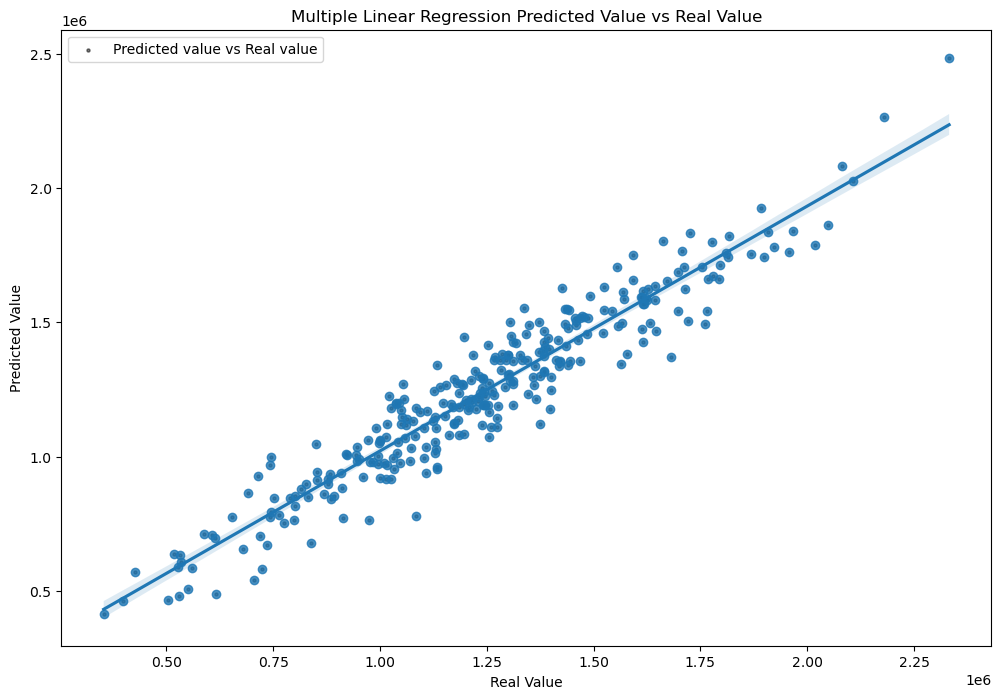

In [15]:
# plot the predicted value and real value

plt.figure(figsize = (12,8))
plt.scatter(y,model.predict(), color = 'black',s = 5, alpha = 0.5, label = 'Predicted value vs Real value')
sns.regplot(x = y, y = model.predict())
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.title('Multiple Linear Regression Predicted Value vs Real Value')
plt.legend()

In [16]:
# get important statistical valur from the model

print('Regression model accuracy based on r-squared is ', model.rsquared)
print('Regression model parameter:\n', model.params)
print('Regression model standard error is ', model.scale**0.5)
print(f'Regression Model is y = {model.params.average_area_income}X1 + {model.params.house_age}X2 + {model.params.rooms}X3 {model.params.bedrooms}X4 + {model.params.area_population}X5 {model.params.const} ')


Regression model accuracy based on r-squared is  0.9113101144215539
Regression model parameter:
 const                 -2.678665e+06
average_area_income    2.157910e+01
house_age              1.649346e+05
rooms                  1.243655e+05
bedrooms               2.803437e+03
area_population        1.574809e+01
dtype: float64
Regression model standard error is  104186.17527405765
Regression Model is y = 21.579101237064457X1 + 164934.6103447043X2 + 124365.46495219448X3 2803.4372498305747X4 + 15.74808695649822X5 -2678664.5578707987 


In [17]:
print(f'For every $100 increase in average area income, the house price will increase ${round(model.params.average_area_income * 100)}')
print(f'For every 1 year increase in house age, the house price will increase ${round(model.params.house_age * 1)}')
print(f'For every 1 room increase in the house, the house price will increase ${round(model.params.rooms * 1)}')
print(f'For every 1 bedroom increase in the house, the house price will increase ${round(model.params.bedrooms * 1)}')
print(f'FOe every 100 people increase in area population, the house price will increase ${round(model.params.area_population * 100)}')

For every $100 increase in average area income, the house price will increase $2158
For every 1 year increase in house age, the house price will increase $164935
For every 1 room increase in the house, the house price will increase $124365
For every 1 bedroom increase in the house, the house price will increase $2803
FOe every 100 people increase in area population, the house price will increase $1575
